<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/10_time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-07-10 10:11:56--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2024-07-10 10:11:56 (44.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
#import pandas
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
#only want closing price for
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


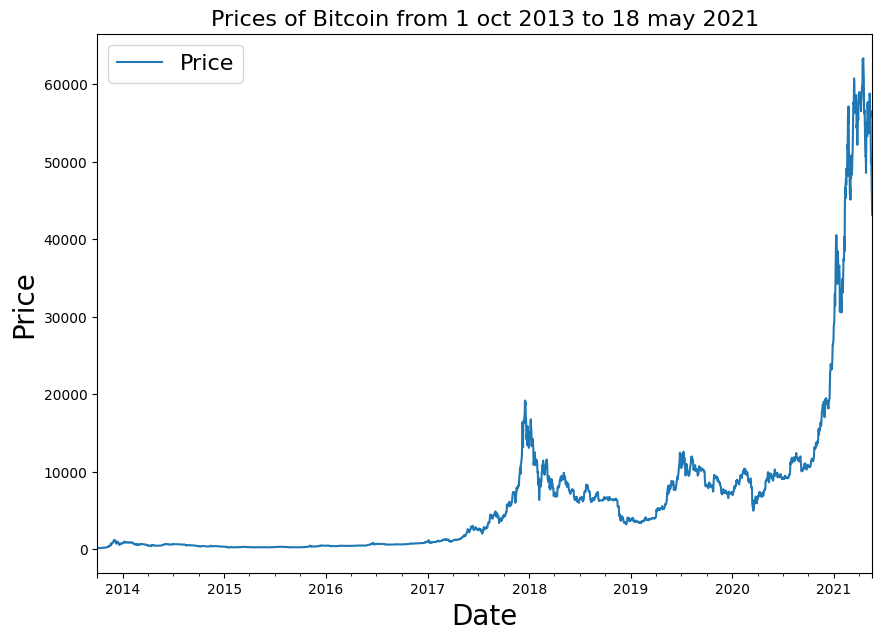

In [5]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.title("Prices of Bitcoin from 1 oct 2013 to 18 may 2021", fontsize=16)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.legend(fontsize=16)
plt.show()

In [6]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r")  as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip first line(this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates as dates ( not strings), strptime
    btc_price.append(float(line[2])) #get the closing price as float

#View frist 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [7]:
#get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
# wrong way to make train/test sets for timr series

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, #dates
                                                    prices, #prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

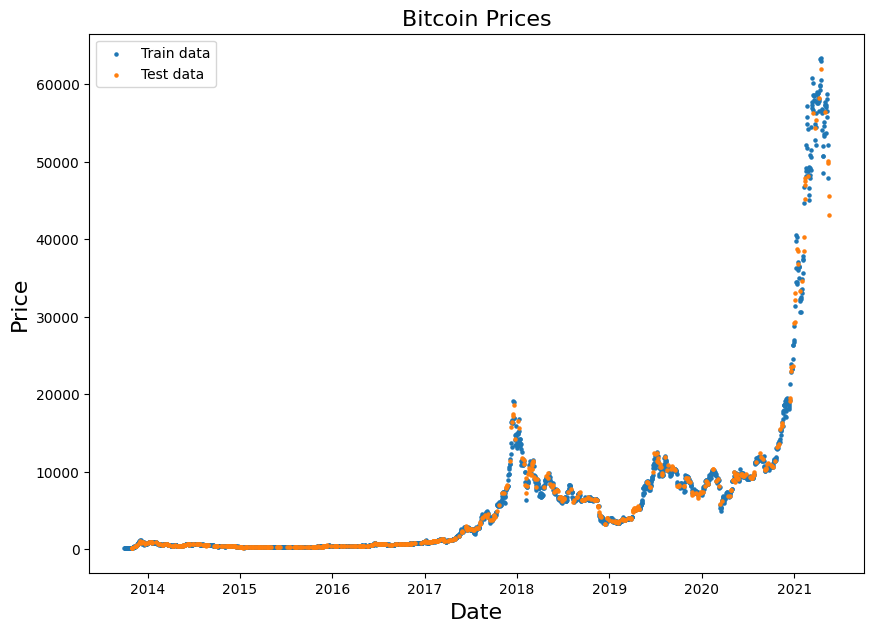

In [9]:
plt.figure(figsize=(10, 7))
plt.title("Bitcoin Prices", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test,s=5 ,label="Test data")
plt.legend()
plt.show()

In [10]:
#create train and test splits the right way for time series data
split_size = int(0.80 * len(prices))
# Create train data
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

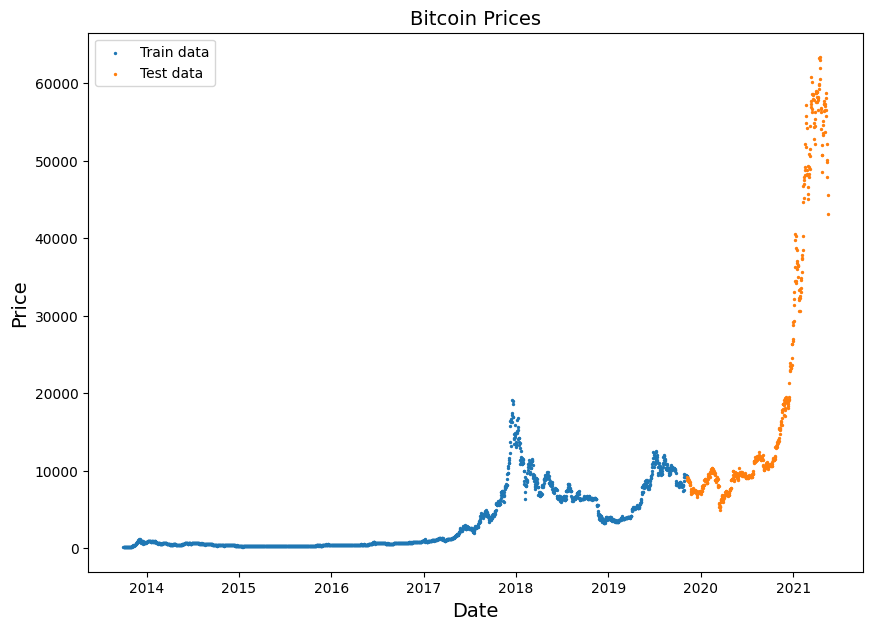

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Bitcoin Prices", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.scatter(X_train, y_train, s=2, label="Train data")
plt.scatter(X_test, y_test, s=2, label="Test data")
plt.legend()
plt.show()

In [12]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

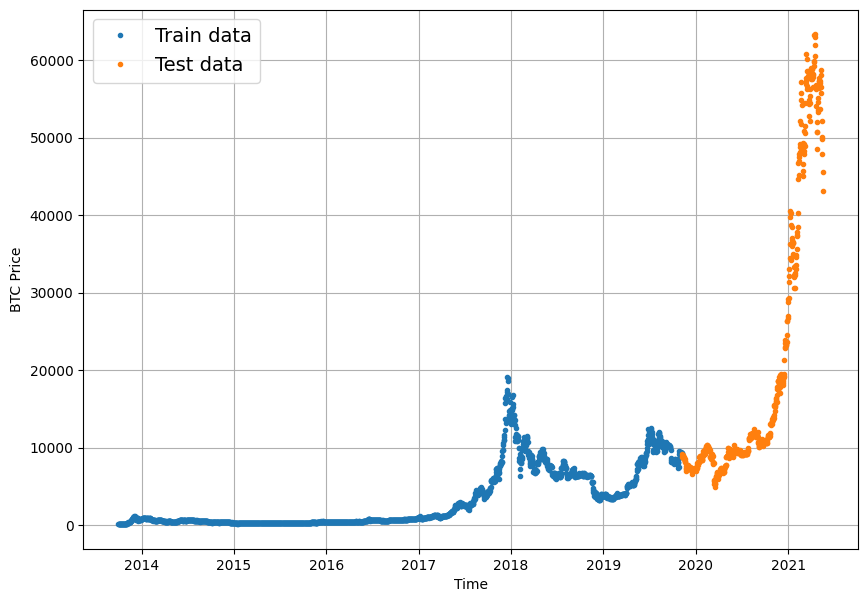

In [13]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [14]:
#naive a neaive forecast
naive_forecast = y_test[:-1] # Naive forecast values
naive_forecast[:10], naive_forecast[-10:] # View first 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

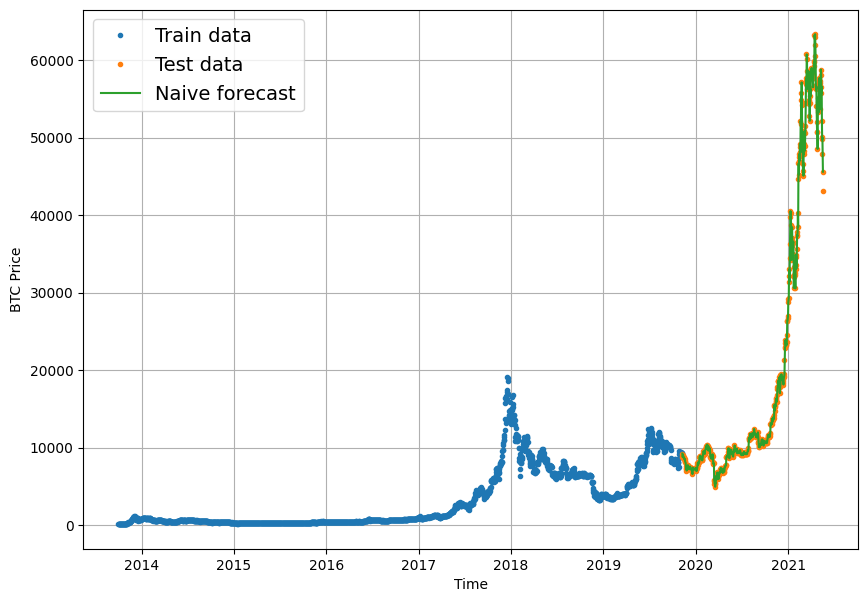

In [15]:
#plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

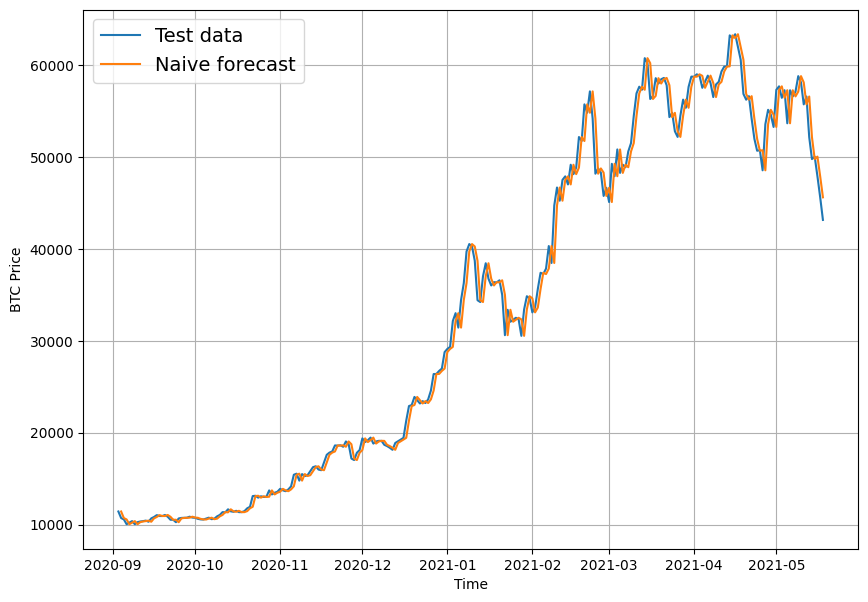

In [16]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, format = '-',  label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=offset, format="-", label="Naive forecast")

In [17]:
import tensorflow as tf

In [18]:
#https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16

def mean_absolute_percentage_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).

  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  #find mae of naive forecast ( no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) #our seasonality is 1 day (hence the shifting of 1 day)

  return mae/mae_naive_no_season



In [19]:
def evaluate_preds(y_true, y_pred):
  #make sure float32(for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_percentage_error(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [21]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

#format data part 2: Windowing datasets

In [22]:
HORIZON =1
WINDOW_SIZE =7

In [23]:
import numpy as np


In [24]:
def get_labelled_window(x, horizon=1):
  """
  Create labels for windowed dataset.
  E.g. if horizon=1 then input
  input: [1,2,3,4,5] -> output: ([1,2,3,4], [5])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
#test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+4, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [ 4  5  6  7  8  9 10] -> Label: 11


In [26]:
#create function to view NumPy arrays as windoms
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size.
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  #print(f"Wimdow step:\n{window_step}"")

  #2. Create a 2D array of multiple window steps (minus 1 to acouunt for indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T #create 2D array of windows of size window_size
  #print(f"Window indexes:\n{window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  #3. Index on the target array (times series ) with 2D array of multipe window steps
  windowed_array = x[window_indexes]

  #4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
# view the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [29]:
#view the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}--> label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]--> label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]--> label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]--> label: [43144.47129086]


In [30]:
#Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [32]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [33]:
import os
#create a function to implement a ModelCheckpoint callback with specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), #create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

#Model 1 : Dense Model(window =7 , horizon= 1)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers


model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

#compile model
model_1.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#fit model
model_1.fit(x=train_windows,
                        y=train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 163ms/step - loss: 1306.9731 - mae: 1306.9731 - val_loss: 2974.3489 - val_mae: 2974.3489
Epoch 2/100
18/18 [==============================] - 2s 88ms/step - loss: 328.3396 - mae: 328.3396 - val_loss: 1397.9098 - val_mae: 1397.9098
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 200.0437 - mae: 200.0437 - val_loss: 1163.2460 - val_mae: 1163.2460
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 164.0226 - mae: 164.0226 - val_loss: 909.2021 - val_mae: 909.2021
Epoch 5/100
18/18 [==============================] - 1s 52ms/step - loss: 154.5507 - mae: 154.5507 - val_loss: 824.4680 - val_mae: 824.4680
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 151.3284 - mae: 151.3284 - val_loss: 854.7235 - val_mae: 854.7235
Epoch 7/100
18/18 [==============================] - 1s 34ms/step - loss: 144.7657 - mae: 144.7657 - val_loss: 768.7689 - val_mae: 768.7689
Epoch 8/100


In [35]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 587.3732 - mae: 587.3732


[587.3732299804688, 587.3732299804688]

In [36]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.4927 - mae: 567.4927


[567.49267578125, 567.49267578125]

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
#make prediction using mdoel_1 on the test datasets and view teh resukts

model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8867.048, 8779.414, 9037.186, 8780.754, 8723.793, 8759.504,
       8678.27 , 8528.223, 8461.803, 8531.347], dtype=float32)>

In [39]:
#evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                y_pred=model_1_preds)
model_1_results

{'mae': 567.4927,
 'mse': 1170158.5,
 'rmse': 1081.7386,
 'mape': 2.536585,
 'mase': 0.99692744}

In [40]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

#model_2

In [41]:
HORIZON =1
WINDOW_SIZE =30

In [42]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [43]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [44]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

#compile model
model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

#fit model
model_2.fit(x=train_windows,
                        y=train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 2s 51ms/step - loss: 1118.7654 - val_loss: 4382.4370
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 412.0276 - val_loss: 1726.6001
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 293.7319 - val_loss: 1355.3373
Epoch 4/100
18/18 [==============================] - 1s 34ms/step - loss: 239.6823 - val_loss: 1220.3809
Epoch 5/100
18/18 [==============================] - 1s 33ms/step - loss: 202.4864 - val_loss: 1072.6035
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - loss: 205.9414 - val_loss: 978.9050
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 180.1791 - val_loss: 1148.7480
Epoch 8/100
18/18 [==============================] - 1s 32ms/step - loss: 172.3245 - val_loss: 977.9073
Epoch 9/100
18/18 [==============================] - 1s 41ms/step - loss: 155.9037 - val_loss: 852.5694
Epoch 10/100
18/18 [==============================] - 1s 4

In [45]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 663.2904


663.2904052734375

In [46]:
# Make sure to save the model after training in the previous code block
model_2.save("model_experiments/model_2_dense")

# Load the model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 663.2904


663.2904052734375

In [47]:
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8611.398 , 8698.898 , 8614.198 , 8443.353 , 8279.415 , 8274.735 ,
       8022.293 , 7933.9937, 8092.9956, 7583.1694], dtype=float32)>

In [48]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                y_pred=model_2_preds)
model_2_results

{'mae': 663.2904,
 'mse': 1379611.2,
 'rmse': 1174.5685,
 'mape': 3.002339,
 'mase': 1.159438}

ValueError: x and y must have same first dimension, but have shapes (258,) and (252,)

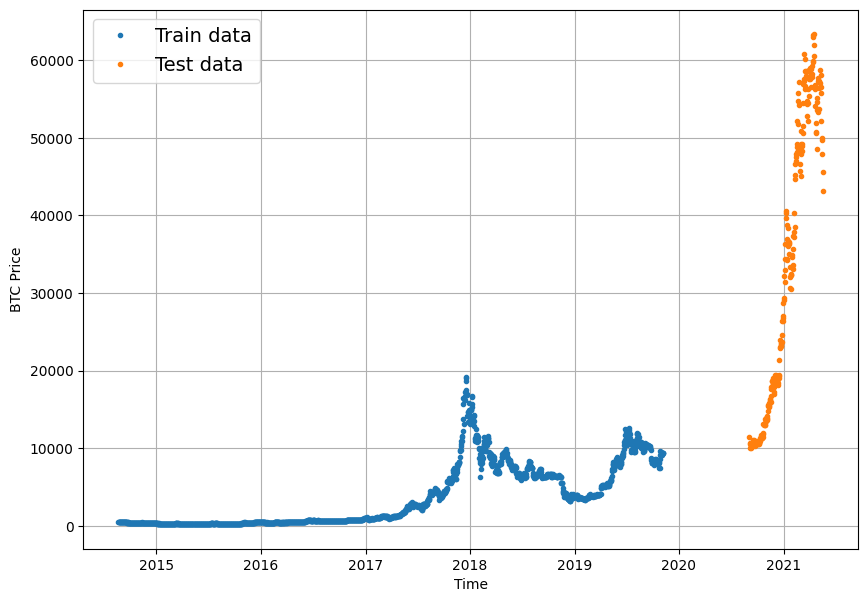

In [49]:
offset =300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train[-len(train_windows):], values= y_train[-len(train_windows):], start=offset, label="Train data")
plot_time_series(timesteps=X_test, values= y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test, values=model_2_preds, start=offset, format="-", label="model_2_preds") # Use the full X_test array for timesteps

In [51]:
def evaluate_preds(y_true, y_pred):
  #make sure float32(for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_percentage_error(y_true, y_pred)

  #Account for different sized metrics( for longer horizons, reduce to single number)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [52]:
#get model_3 results aggregated to single values
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                y_pred=model_2_preds)
model_2_results

{'mae': 663.2904,
 'mse': 1379611.2,
 'rmse': 1174.5685,
 'mape': 3.002339,
 'mase': 1.159438}

<Axes: >

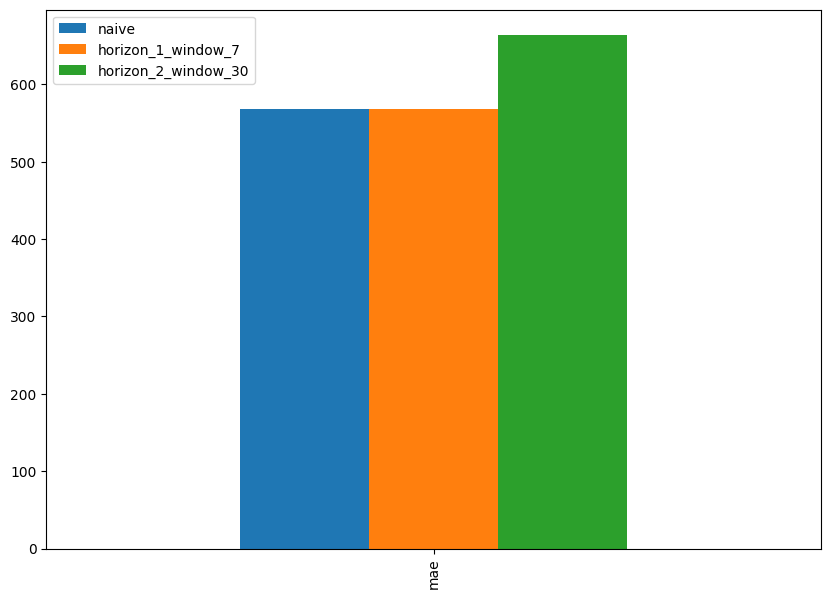

In [53]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_2_window_30": model_2_results["mae"]},index=["mae"]).plot(figsize=(10,7), kind='bar')

#CONV1D

In [54]:
HORIZON =1
WINDOW_SIZE =7

In [55]:
#create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [56]:
#create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

#Data windowed

In [57]:
train_windows[0].shape #window_size

(7,)

In [58]:
#before we pass our data ti the convqd layer , we have to reshape it in order to make sure it works

x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") #(Windows_size)
print(f"Expanded shape: {expand_dims_layer(x).shape}") #(window_size, input_dims)
print(f"Original values with expand shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expand shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [59]:
tf.random.set_seed(42)

#craete model
model_4 = tf.keras.Sequential([
    #create lambda layer to reshape inputs, without this layer, the model wil error
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # add an extra dimension for
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1d")

#compile model
model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

#fit model
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [60]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.1049


567.1048583984375

In [62]:
#make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8907.3  , 8819.97 , 9022.452, 8801.393, 8788.382, 8756.072,
       8698.108, 8566.721, 8485.235, 8541.177], dtype=float32)>

In [63]:
#Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                y_pred=model_4_preds)
model_4_results

{'mae': 567.105,
 'mse': 1172335.8,
 'rmse': 1082.7445,
 'mape': 2.5472736,
 'mase': 0.9962464}

#Multi modal


In [64]:
#block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset(it starts from)
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

#block reward dates ( datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [65]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [66]:
#Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

#set values of block column
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.sample(10)

,Price,block_reward
Date,,
2017-01-04,1047.099990,12.5
2018-06-01,7490.621250,12.5
2020-08-11,11832.227308,6.25
2014-04-28,426.781660,25
2016-08-14,581.650000,12.5
2015-09-23,231.309830,25
2017-11-17,7924.182500,12.5
2017-02-03,1020.090000,12.5
2014-09-02,477.983750,25


<Axes: xlabel='Date'>

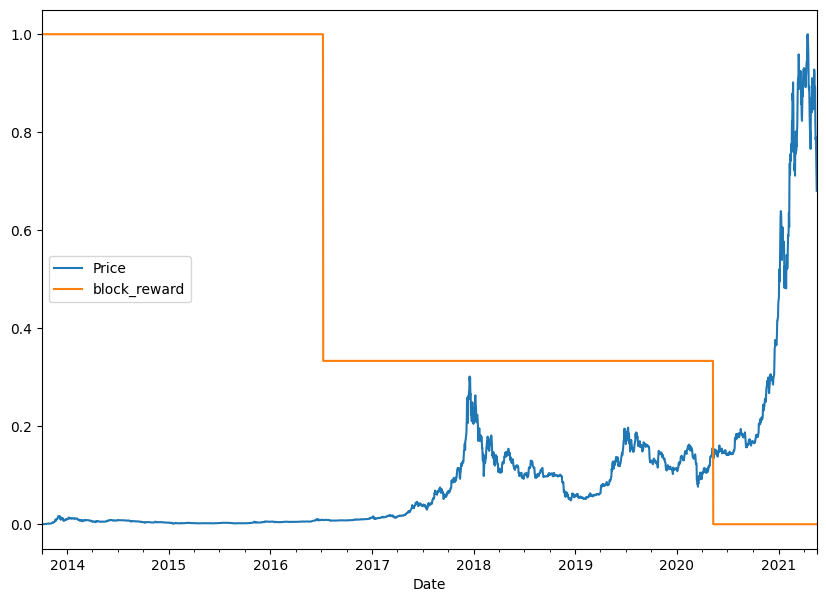

In [67]:
#plot the block reward /price
#Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)


scaled_price_block_df.plot(figsize=(10,7))


In [68]:

#setup dataset hyperparamets

HORIZON = 1
WINDOW_SIZE = 7

In [69]:
#MAKE A COPY OF THE BITOCIN HISTORYCAL DATA WITH BLOCK reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#Add windowed columns
for i in range(WINDOW_SIZE): #shift values for each step in window size
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [70]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [71]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [72]:
#make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

#Model 6

In [73]:
tf.random.set_seed(42)

#make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(HORIZON)
], name ="model_6_dense_multivariate")

#compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1, #only print 1 line per epoch
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 56ms/step - loss: 615.8705 - val_loss: 2257.9128
Epoch 2/100
18/18 [==============================] - 1s 42ms/step - loss: 236.0269 - val_loss: 1090.0966
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 155.7144 - val_loss: 929.3660
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 141.8660 - val_loss: 658.6451
Epoch 5/100
18/18 [==============================] - 1s 48ms/step - loss: 129.4023 - val_loss: 640.4214
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 127.3082 - val_loss: 656.8605
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 126.3543 - val_loss: 643.8448
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 129.8977 - val_loss: 753.6140
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 144.2842 - val_loss: 823.6026
Epoch 10/100
18/18 [==============================] - 0s 7ms/step 

In [74]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 577.5736


577.5736083984375

In [75]:
#make prediction on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8792.223, 8768.111, 9075.577, 8771.826, 8760.748, 8743.555,
       8669.959, 8509.311, 8464.968, 8541.344], dtype=float32)>

In [76]:
#evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 577.5738,
 'mse': 1174569.1,
 'rmse': 1083.7754,
 'mape': 2.6052053,
 'mase': 1.0146372}

In [77]:
model_1_results

{'mae': 567.4927,
 'mse': 1170158.5,
 'rmse': 1081.7386,
 'mape': 2.536585,
 'mase': 0.99692744}

#MODEL 7: N-BEATS algorithm

In [78]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,#the constructor takes all the hyperparamets for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #the **kwargs argument takes care of all of the arguments for the
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta") # Fix: Renamed to self.theta_layer
  def call(self, inputs): #the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: #pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x) # Fix: Use self.theta_layer
    #output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [79]:
#set up dummy NBEATSBLOK layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                              theta_size=WINDOW_SIZE+HORIZON,
                              horizon=HORIZON,
                              n_neurons=128,
                              n_layers=4)


In [80]:
#Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) #input shape to the model
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [81]:
#pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
#these are the activation outputs of the thetra layer (they'll be random due to no training of the model)
print(f"backcast {tf.squeeze(backcast.numpy())}")
print(f"forecast {tf.squeeze(forecast.numpy())}")

backcast [ 0.994438   -0.53887093 -0.67932266  0.55513847 -0.87361664  1.6549933
 -0.209694  ]
forecast -0.17894965410232544


In [82]:
HORIZON = 1
WINDOW_SIZE = 7 # how far to

In [83]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [84]:
# add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [85]:
#Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#Make split train and test
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [86]:
#1. turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#2. Combine features & lables
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip( (test_features_dataset, test_labels_dataset))


#3. batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [87]:
#values from N-BEATS paper figure 1 and Table 18/ Appendix D
N_EPOCHS = 5000 #CALLED "iternations"
N_NEURONS = 512 #CALLED "WIDTH" IN TABLE 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON #CALLED "LOOKBACK" IN TABLE 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [88]:
#make tensors
tensor_1 = tf.range(10) +10
tensor_2 = tf.range(10)

#subtract
subtracted = layers.subtract([tensor_1, tensor_2])

#ADD
added = layers.add([tensor_1, tensor_2])

print(f"input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"subtracted: {subtracted.numpy()}")
print(f"added: {added.numpy()}")

input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
subtracted: [10 10 10 10 10 10 10 10 10 10]
added: [10 12 14 16 18 20 22 24 26 28]


In [89]:
%%time

tf.random.set_seed(42)

# 1 setup n-beats block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                             theta_size=THETA_SIZE,
                             horizon=HORIZON,
                             n_neurons=N_NEURONS,
                             n_layers=N_LAYERS,
                             name='InitialBlock')

# 2 create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3 Create initial backcast and forecast input (backwards predictions are referred to as residuals inn the paper)
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, forecast], name=f"subtract_00") #subtract the input from the forecast

#4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): #first stack is already creted in (3)

  #5.use the NBEATSBLOCK TO calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}")(residuals) #pass it in residuals(the backcast)

  # 6 create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  residuals = layers.add([residuals, backcast], name=f"add_{i}")

#7. put the stack model together
model_7 = tf.keras.Model(inputs = stack_input,
                         outputs = forecast,
                         name="model_7_N-BEATS")


#8. COMPILE WITH MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["mae", "mse"])

#9. fit the model with EarlyStopping and Reducelronplateau callbacks

model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose =0, #prevent large amounts of training outputs
            #callbacks = [craate_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100,  verbose=1)])


Epoch 877: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1109: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1209: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 8min 31s, sys: 8.85 s, total: 8min 40s
Wall time: 7min 12s


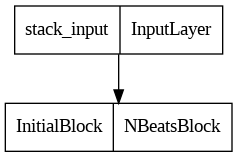

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [91]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 66ms/step - loss: 577.8917 - mae: 577.8917 - mse: 1170492.7500


[577.8917236328125, 577.8917236328125, 1170492.75]

In [92]:
model_7.summary()

Model: "model_7_N-BEATS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stack_input (InputLayer)    [(None, 7)]               0         
                                                                 
 InitialBlock (NBeatsBlock)  ((None, 7),               796168    
                              (None, 1))                         
                                                                 
Total params: 796168 (3.04 MB)
Trainable params: 796168 (3.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 0s 113ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8834.197, 8768.548, 9024.19 , 8755.542, 8729.891, 8737.986,
       8653.344, 8498.157, 8457.964, 8509.353], dtype=float32)>

In [94]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 577.8917,
 'mse': 1170492.8,
 'rmse': 1081.8932,
 'mape': 2.6054354,
 'mase': 1.0151957}

In [95]:

model_7.save("model_7_N-BEATS")

#ensemble of models

In [98]:
def get_ensemble_models(horizon=HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")


      model = tf.keras.Sequential([
          layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
          layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
          layers.Dense(HORIZON)
      ])

      #compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      #fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data = test_data,
                #add callbacks to prevent training from going/stalling for too long
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                              patience=200,
                                                              restore_best_weights=True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                  patience=100,
                                                                  verbose=1)])
      ensemble_models.append(model)
  return ensemble_models

In [99]:
%%time
# get list of trained enseble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 451: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 551: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 420: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 520: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 205: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 305: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 116: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 833: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 933: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing 

#making predictions with an enseble model

In [108]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [109]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds[:10]

1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 55ms/step


<tf.Tensor: shape=(10, 556), dtype=float32, numpy=
array([[ 8830.462,  8718.713,  8997.216, ..., 50038.023, 48961.22 ,
        45920.39 ],
       [ 8785.186,  8746.311,  9056.589, ..., 49864.387, 48366.766,
        45973.703],
       [ 8807.268,  8786.119,  9029.666, ..., 49924.277, 48057.363,
        46194.77 ],
       ...,
       [ 8755.418,  8752.407,  8977.487, ..., 49701.664, 48257.45 ,
        46396.965],
       [ 8770.206,  8788.813,  9077.632, ..., 50199.973, 47909.734,
        45832.156],
       [ 8803.205,  8810.661,  9085.966, ..., 49767.18 , 48322.316,
        45642.082]], dtype=float32)>

In [110]:
#evaluate ensemble  model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                      y_pred=np.median(ensemble_preds, axis=0)) #take the median across all ensemble
ensemble_results

{'mae': 568.0565,
 'mse': 1137575.1,
 'rmse': 1066.5717,
 'mape': 2.5741258,
 'mase': 0.99791795}

#Plotiing the prediction intervals

In [111]:
def get_upper_lower(preds): # 1. take the predictions of multiple eandomly initialized deep learning neural networks

  #2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  #3. Multiple the standard deviation by 1.96
  interval = 1.96 * std

  #4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

#get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

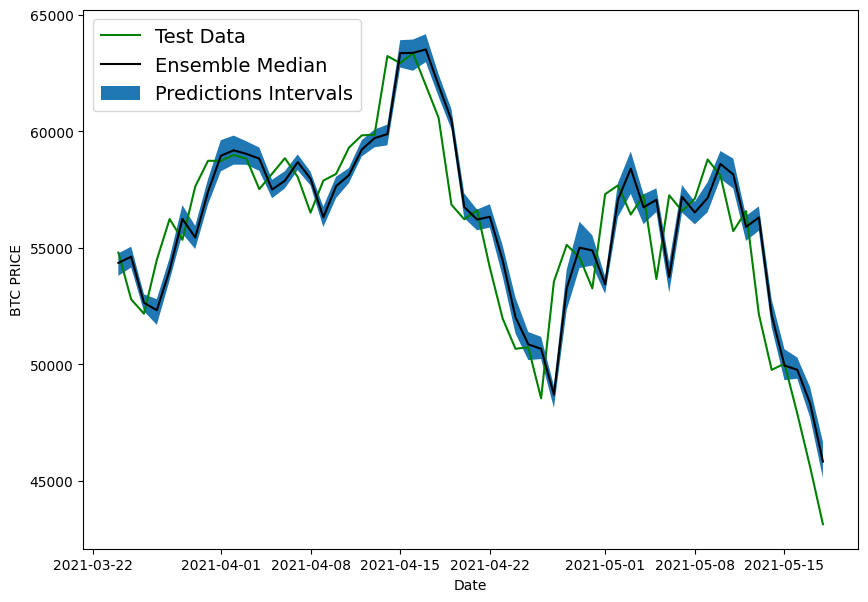

In [112]:
# get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

#plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC PRICE")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = "Predictions Intervals")
plt.legend(loc="upper left", fontsize=14)